<div style="text-align: center; font-size: 28px">Boston Marathon Analysis </div>
Team Members:
<div style="text-align: left; font-size: 12px">    Karthik Sunil </div>
<div style="text-align: left; font-size: 12px">    Parth Trivedi </div>
<div style="text-align: left; font-size: 12px">    Meghana Bangalore Srikantha </div>
<div style="text-align: left; font-size: 12px">    Pooja Kuberaiah </div>



In [1]:
!pwd

/Users/karthik/Downloads/archive (3)


In [81]:
import numpy as np
import pandas as pd
from datetime import datetime, time
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df_2015 = pd.read_csv("marathon_results_2015.csv")
df_2016 = pd.read_csv("marathon_results_2016.csv")
df_2017 = pd.read_csv("marathon_results_2017.csv")

In [34]:
df_2015 = df_2015.drop(['Unnamed: 0', 'Bib','Unnamed: 9','Citizen','Proj Time'], axis = 'columns')
df_2015.columns

Index(['Name', 'Age', 'M/F', 'City', 'State', 'Country', '5K', '10K', '15K',
       '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time',
       'Overall', 'Gender', 'Division'],
      dtype='object')

In [35]:
df_2016 = df_2016.drop(['Bib','Unnamed: 8','Citizen','Proj Time'], axis = 'columns')
df_2016.columns

Index(['Name', 'Age', 'M/F', 'City', 'State', 'Country', '5K', '10K', '15K',
       '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time',
       'Overall', 'Gender', 'Division'],
      dtype='object')

In [36]:
df_2017 = df_2017.drop(['Unnamed: 0','Bib','Unnamed: 9','Citizen','Proj Time'], axis = 'columns')
df_2017.columns

Index(['Name', 'Age', 'M/F', 'City', 'State', 'Country', '5K', '10K', '15K',
       '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time',
       'Overall', 'Gender', 'Division'],
      dtype='object')

In [40]:
print(df_2015.info())
print(df_2016.info())
print(df_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           26598 non-null  object
 1   Age            26598 non-null  int64 
 2   M/F            26598 non-null  object
 3   City           26598 non-null  object
 4   State          24047 non-null  object
 5   Country        26598 non-null  object
 6   5K             26598 non-null  object
 7   10K            26598 non-null  object
 8   15K            26598 non-null  object
 9   20K            26598 non-null  object
 10  Half           26598 non-null  object
 11  25K            26598 non-null  object
 12  30K            26598 non-null  object
 13  35K            26598 non-null  object
 14  40K            26598 non-null  object
 15  Pace           26598 non-null  object
 16  Official Time  26598 non-null  object
 17  Overall        26598 non-null  int64 
 18  Gender         26598 non-n

In [39]:
common_names = set(df_2015['Name']).intersection(set(df_2016['Name']))
df1_common = df_2015[df_2015['Name'].isin(common_names)]
df1_common.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5555 entries, 0 to 26591
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           5555 non-null   object
 1   Age            5555 non-null   int64 
 2   M/F            5555 non-null   object
 3   City           5555 non-null   object
 4   State          5349 non-null   object
 5   Country        5555 non-null   object
 6   5K             5555 non-null   object
 7   10K            5555 non-null   object
 8   15K            5555 non-null   object
 9   20K            5555 non-null   object
 10  Half           5555 non-null   object
 11  25K            5555 non-null   object
 12  30K            5555 non-null   object
 13  35K            5555 non-null   object
 14  40K            5555 non-null   object
 15  Pace           5555 non-null   object
 16  Official Time  5555 non-null   object
 17  Overall        5555 non-null   int64 
 18  Gender         5555 non-nul

In [44]:
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017

In [91]:
test_df = pd.concat([df_2015, df_2016, df_2017])
test_df.loc[~test_df['Country'].isin(['USA','CAN']), 'State'] = 'N/A'
test_df = test_df.drop(['Overall', 'Gender', 'Division'], axis='columns')
columns = ['5K','10K','15K','20K','Half','25K','30K','35K','40K','Pace','Official Time']
test_df[columns] = test_df[columns]

In [105]:
time_columns = ['5K', '10K', '15K',
       '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace','Official Time']

test_df.replace('-','00:00:00', inplace=True)

#test_df['5K','10K'] = pd.to_datetime(test_df['5K'], format='%H:%M:%S').dt.time

def strTimeToMinutes(timestr):
    time_split = timestr.split(':')
    hours = int(time_split[0])
    minutes = int(time_split[1])
    seconds = int(time_split[2])
    time = hours*60 + minutes + seconds/60
    return time

for time in time_columns:
    test_df[time] = test_df[time].apply(lambda x: strTimeToMinutes(x))



AttributeError: 'float' object has no attribute 'split'

In [106]:
test_df.head()

,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Year
0,"Desisa, Lelisa",25,M,Ambo,N/A,ETH,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,122.650000,4.933333,129.283333,2015
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,N/A,ETH,14.716667,29.716667,44.966667,60.466667,64.016667,76.116667,91.983333,107.983333,122.700000,4.966667,129.800000,2015
2,"Chebet, Wilson",29,M,Marakwet,N/A,KEN,14.716667,29.716667,44.950000,60.483333,64.033333,76.116667,92.000000,107.983333,123.016667,4.983333,130.366667,2015
3,"Kipyego, Bernard",28,M,Eldoret,N/A,KEN,14.716667,29.733333,45.016667,60.483333,64.033333,76.116667,92.000000,108.050000,123.783333,5.000000,130.783333,2015
4,"Korir, Wesley",32,M,Kitale,N/A,KEN,14.716667,29.733333,44.966667,60.466667,64.016667,76.116667,92.000000,107.983333,123.450000,5.000000,130.816667,2015


array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': '5K'}>,
        <AxesSubplot: title={'center': '10K'}>,
        <AxesSubplot: title={'center': '15K'}>],
       [<AxesSubplot: title={'center': '20K'}>,
        <AxesSubplot: title={'center': 'Half'}>,
        <AxesSubplot: title={'center': '25K'}>,
        <AxesSubplot: title={'center': '30K'}>],
       [<AxesSubplot: title={'center': '35K'}>,
        <AxesSubplot: title={'center': '40K'}>,
        <AxesSubplot: title={'center': 'Pace'}>,
        <AxesSubplot: title={'center': 'Official Time'}>],
       [<AxesSubplot: title={'center': 'Year'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

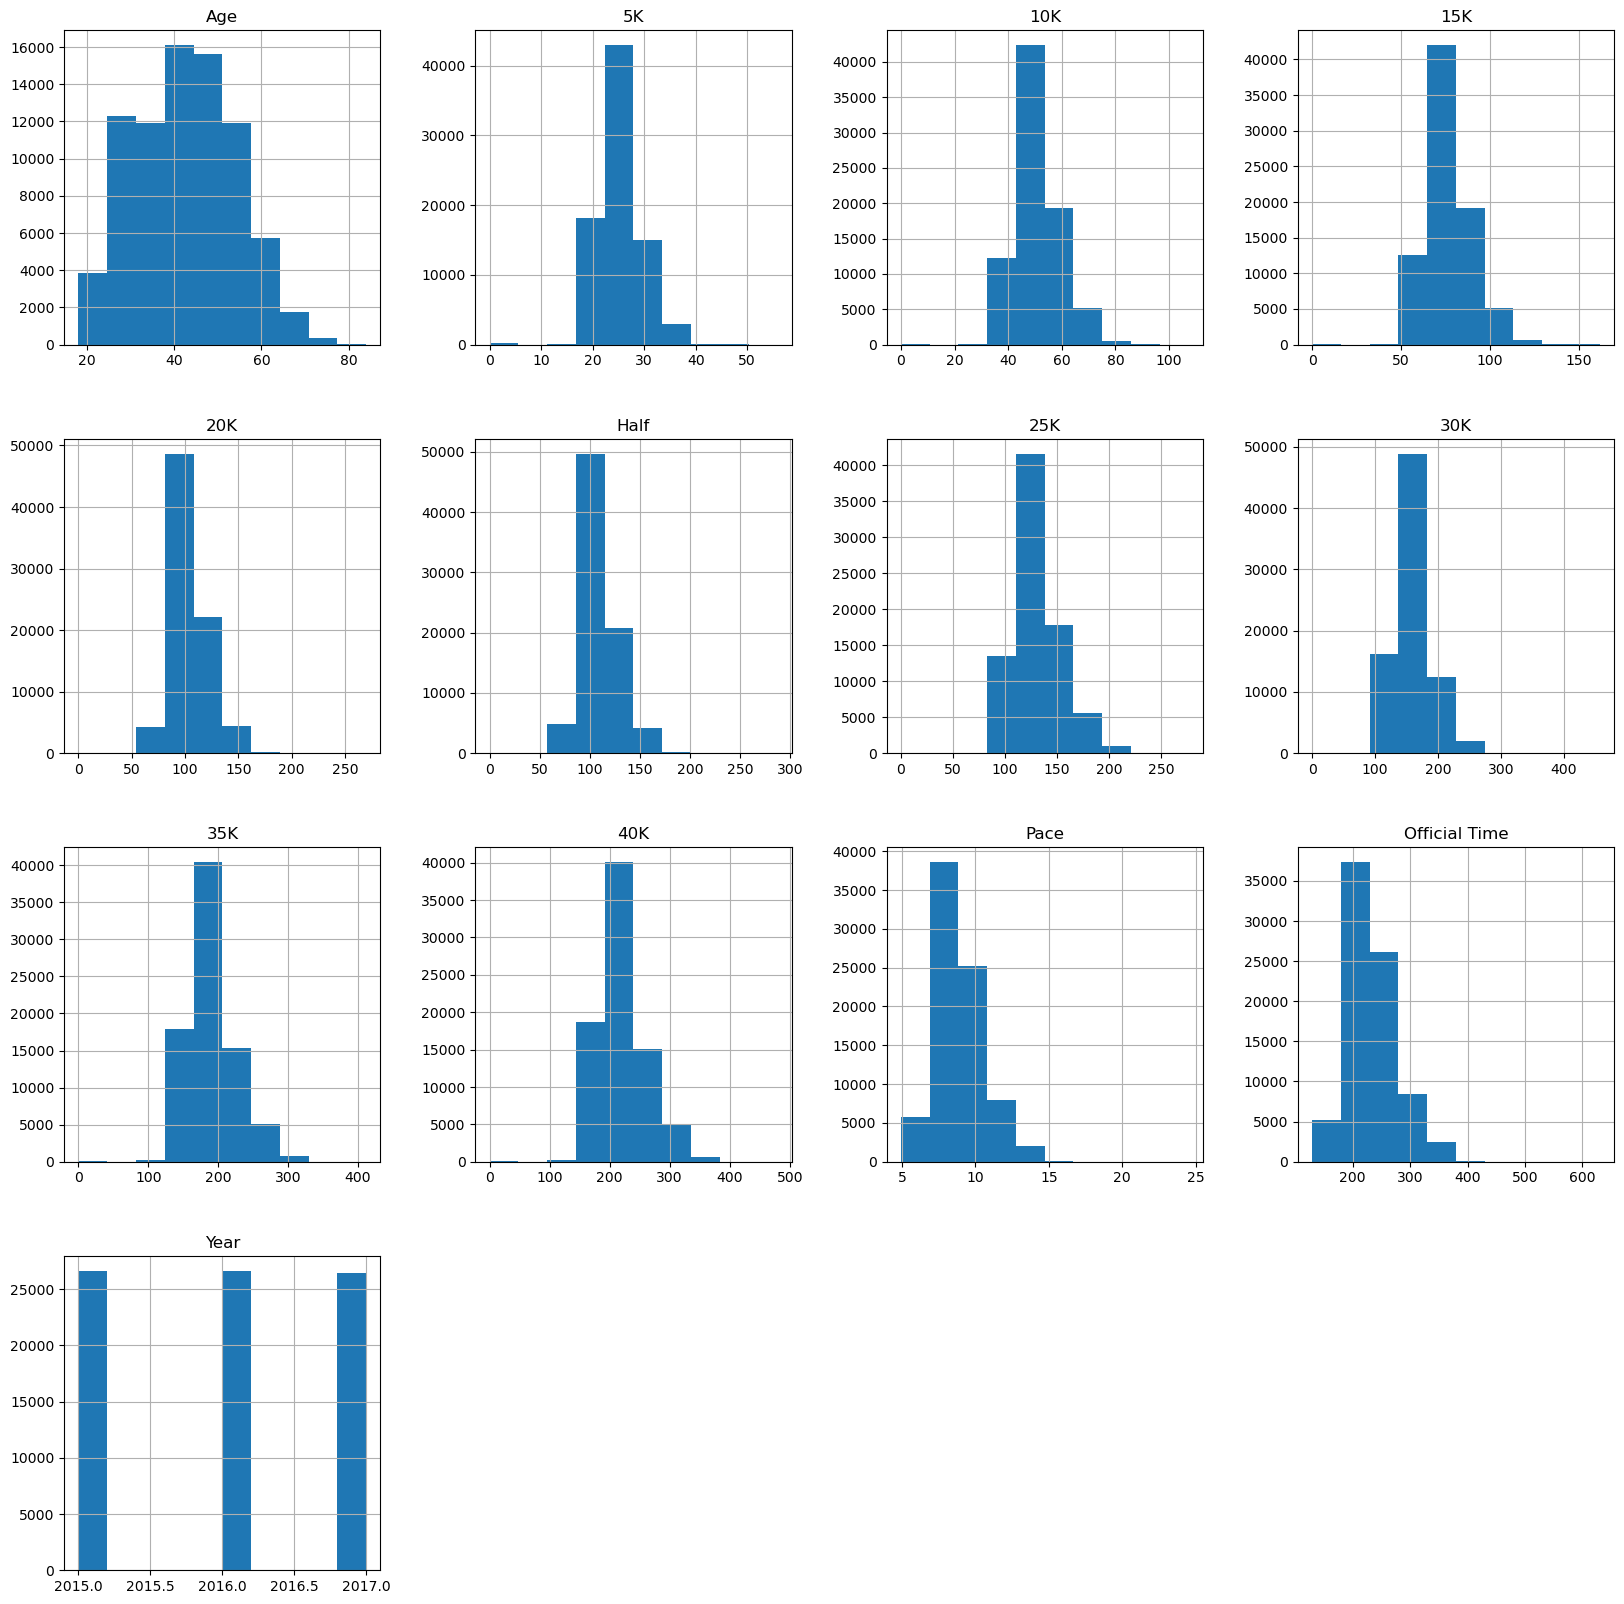

In [108]:
test_df.hist(figsize=(20,20))

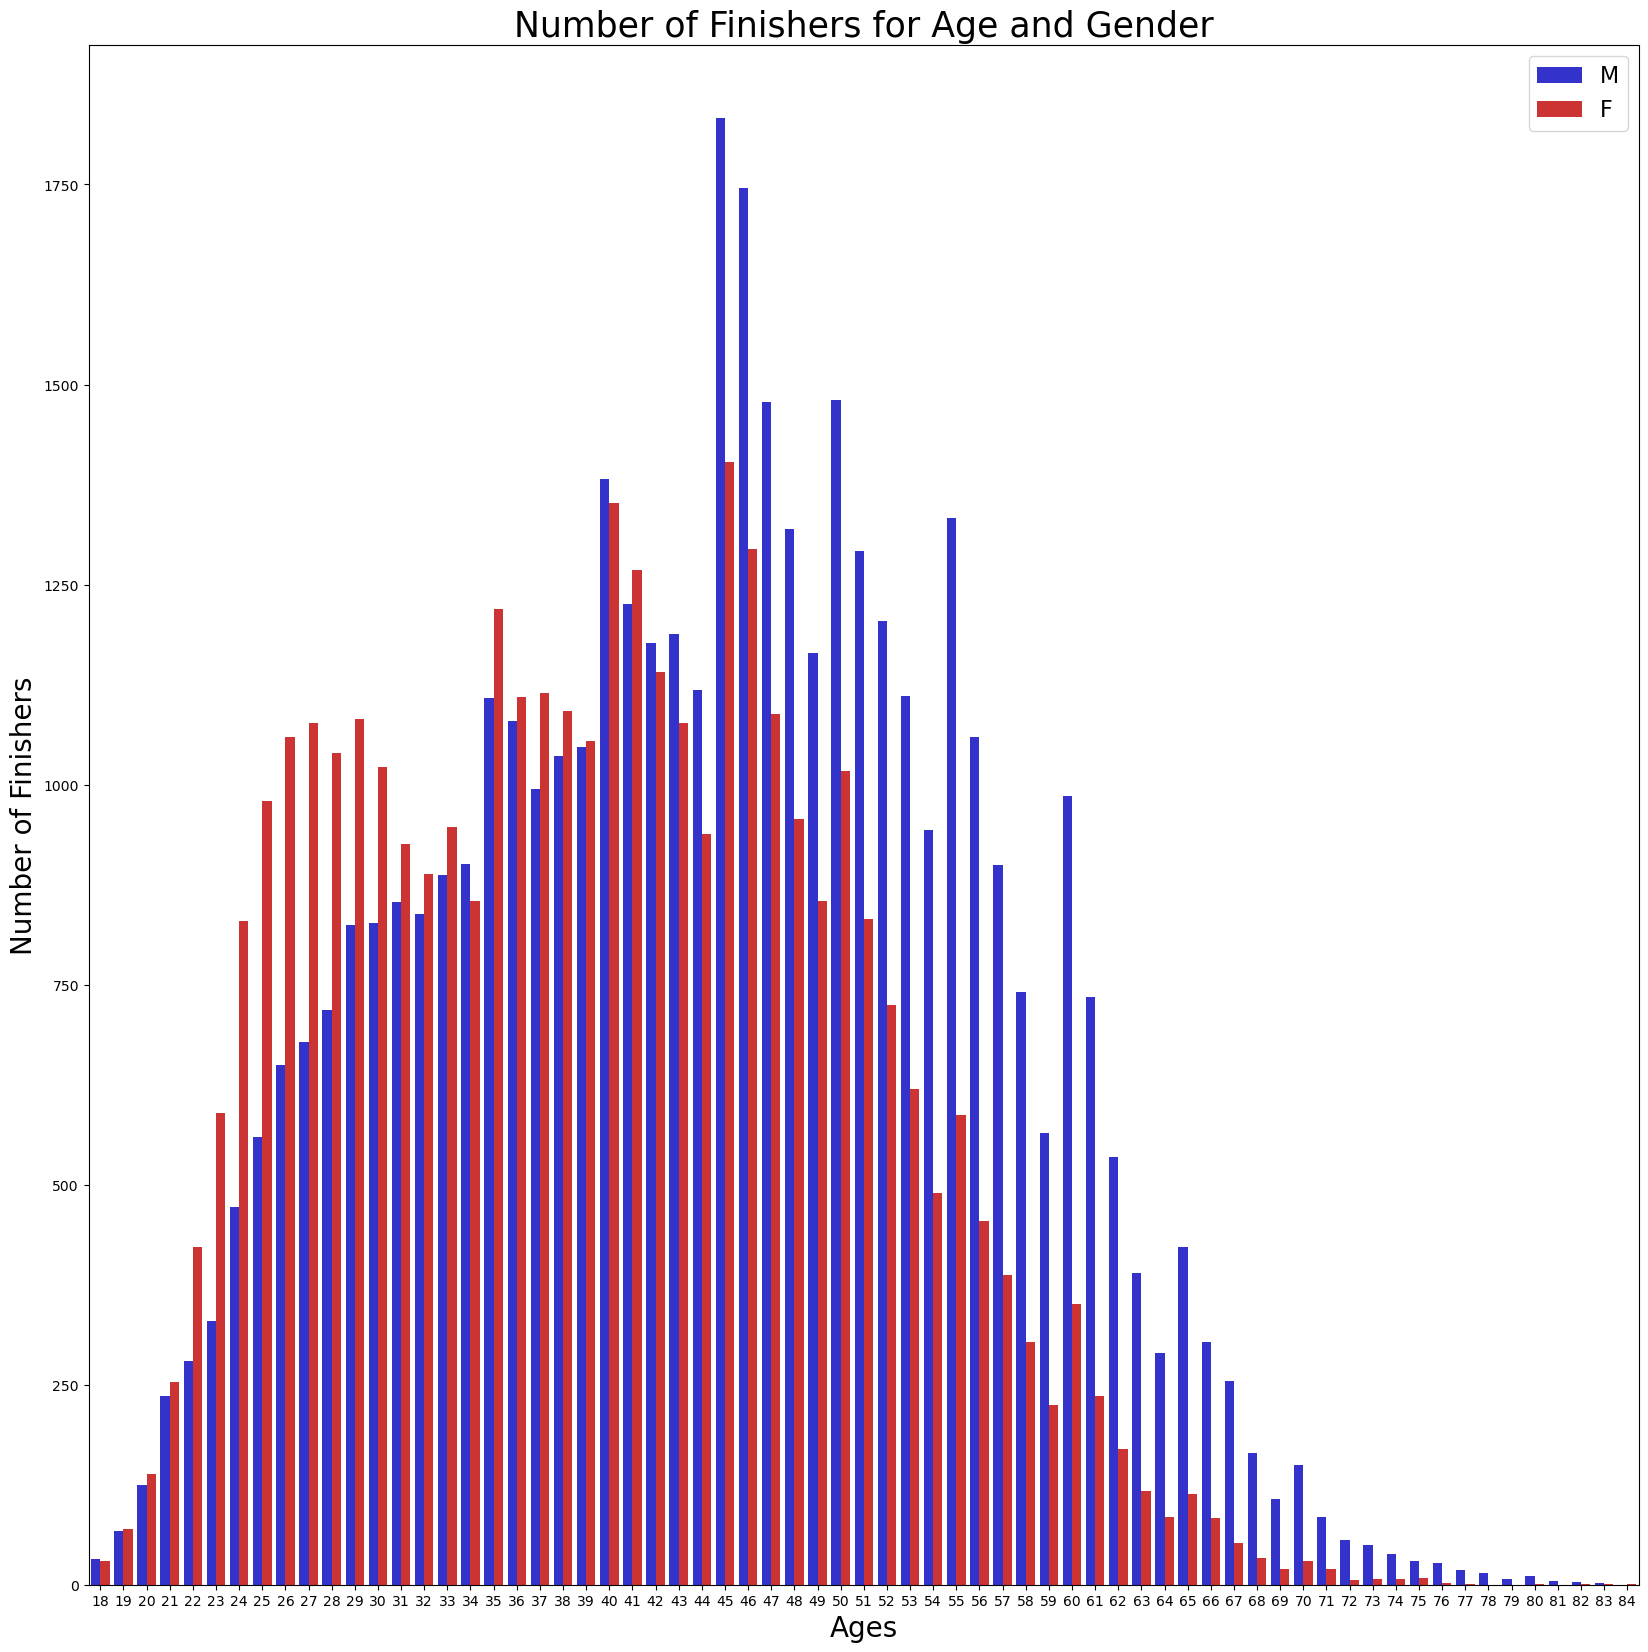

In [85]:
plt.figure(figsize=(20,20))
d = sns.countplot(x='Age', hue='M/F', data=test_df, palette={'F':'r','M':'b'}, saturation=0.6)
d.set_title('Number of Finishers for Age and Gender', fontsize=25)
d.set_xlabel('Ages',fontdict={'size':20})
d.set_ylabel('Number of Finishers',fontdict={'size':20})
d.legend(fontsize=16)
plt.show()